In [39]:
import numpy as np
from numpy.random import default_rng
import math
from math import ceil, log
from numpy import e
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from sklearn import preprocessing
from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from sklearn import preprocessing

In [40]:
def psi1(t, c1, c2, c3, c4, epsilon, delta, chi):
    return c1*epsilon*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c2*epsilon*t*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c2*squareroot(epsilon, delta, chi)*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c3*epsilon*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c4*epsilon*t*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c4*(delta**2 + 2*delta*chi + epsilon**2)*e**(t*squareroot(epsilon, delta, chi)/2) \
    /((delta + 2*chi)*squareroot(epsilon, delta, chi))
    
def psi2(t, c1, c2, c3, c4, epsilon, delta, chi):
    return -c1*squareroot(epsilon, delta, chi)*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c2*epsilon*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) - \
    c2*t*squareroot(epsilon, delta, chi)*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c3*squareroot(epsilon, delta, chi)*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c4*epsilon*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c4*t*squareroot(epsilon, delta, chi)*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi)
    
def phi1(t, c1, c2, c3, c4, epsilon, delta, chi):
    return c1*e**(-t*squareroot(epsilon, delta, chi)/2) + \
    c2*t*e**(-t*squareroot(epsilon, delta, chi)/2) + \
    c3*e**(t*squareroot(epsilon, delta, chi)/2) + \
    c4*t*e**(t*squareroot(epsilon, delta, chi)/2)

def phi2(t, c2, c4, epsilon, delta, chi):
    return c2*e**(-t*squareroot(epsilon, delta, chi)/2) + \
    c4*e**(t*squareroot(epsilon, delta, chi)/2)

def check_sqrt(epsilon, delta, chi):
    return -delta**2 - 2*delta*chi - epsilon**2 < 0

def squareroot(epsilon, delta, chi):
    result = -delta**2 - 2*delta*chi - epsilon**2
    return math.sqrt(result)

def func(xp):
    return ((abs(psi1(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])))**2 + \
            (abs(psi2(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])))**2 + \
            (abs(phi1(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])))**2 + \
            (abs(phi2(xp[0], xp[2], xp[4], xp[5], xp[6], xp[7])))**2)

In [41]:
def normalize_func(xp):
    psi_squared = (abs(psi1(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])))**2 + \
            (abs(psi2(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])))**2
    phi_squared = (abs(phi1(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])))**2 + \
            (abs(phi2(xp[0], xp[2], xp[4], xp[5], xp[6], xp[7])))**2
    return [psi_squared**2/(psi_squared**2+phi_squared**2), phi_squared**2/(psi_squared**2+phi_squared**2)]

In [42]:
def a(xp):
    psi1p = psi1(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])
    psi2p = psi2(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])
    psi_squared = (abs(psi1p))**2 + (abs(psi2p))**2
    second_half = psi2p*np.conj(psi1p) - psi1p*np.conj(psi2p)
    return complex(psi_squared, second_half)

def b(xp):
    psi1p = psi1(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])
    psi2p = psi2(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])
    phi1p = phi1(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])
    phi2p = phi2(xp[0], xp[2], xp[4], xp[5], xp[6], xp[7])
    first_half = psi1p*np.conj(phi1p) + psi2p*np.conj(phi2p)
    second_half = psi2p*np.conj(phi1p) - psi1p*np.conj(phi2p)
    return complex(first_half, second_half)

def c(xp):
    psi1p = psi1(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])
    psi2p = psi2(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])
    phi1p = phi1(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])
    phi2p = phi2(xp[0], xp[2], xp[4], xp[5], xp[6], xp[7])
    first_half = phi1p*np.conj(psi1p) + phi2p*np.conj(psi2p)
    second_half = phi2p*np.conj(psi1p) - phi1p*np.conj(psi2p)
    return complex(first_half, second_half)

def d(xp):
    phi1p = phi1(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])
    phi2p = phi2(xp[0], xp[2], xp[4], xp[5], xp[6], xp[7])
    phi_squared = (abs(phi1p))**2 + (abs(phi2p))**2
    second_half = phi2p*np.conj(phi1p) - phi1p*np.conj(phi2p)
    return complex(phi_squared, second_half)

In [48]:
def paramlist(t):
    return [t, -8.042455772869037, 0.4104156269769683, 0.7626971134550099, 0.12854464458518508, 0.7365235537491663, 0.5104429911912247, -0.8622287451860423]

In [110]:
#test
x = [0, -8.042455772869037, 0.4104156269769683, 0.7626971134550099, 0.12854464458518508, 0.7365235537491663, 0.5104429911912247, -0.8622287451860423]

arr = np.array([[a(x), b(x)], [c(x), d(x)]])
answer = np.linalg.eig(arr)
print(answer[1])
print(answer[1][:,0])

[[ 0.82805518+0.j         -0.51194957+0.22854377j]
 [ 0.51194957+0.22854377j  0.82805518+0.j        ]]
[0.82805518+0.j         0.51194957+0.22854377j]


In [123]:
eval1 = [] #list of 201 values, increments of 0.05 from 0-10; array of 1st eigenval
eval2 = [] #list of 201 values, increments of 0.05 from 0-10; array of 2nd eigenval
evect1 = [] #201 x 2 array, t = 0.05*index; array of first eigenvector
evect2 = [] #201 x 2 array, t = 0.05*index; array of second eigenvector
entropies = [] #list of 201 values, increments of 0.05 from 0-10; array of p1*np.log(p1) + p2*np.log(p2) eigenval
num_ts = 201 # 0 to 10 inclusive, incrementing by 0.05
for i in range(num_ts): 
    evect1.append([0] * 2)
    evect2.append([0] * 2)

for i in range(num_ts):
    x = paramlist(0.05*i)
    arr = np.array([[a(x), b(x)], [c(x), d(x)]])
    result = np.linalg.eig(arr)
    eval1.append(result[0][0])
    eval2.append(result[0][1])
    evect1[i] = result[1][:,0] #1st column vect
    evect2[i] = result[1][:,1] #2nd column vect
    entropies.append(eval1[i]*np.log(eval1[i]) + eval2[i]*np.log(eval2[i]))
    
evect1 = np.array(evect1)
evect2 = np.array(evect2)

In [121]:
#np.array(evect1)

In [122]:
#np.array(evect1)[:,0]

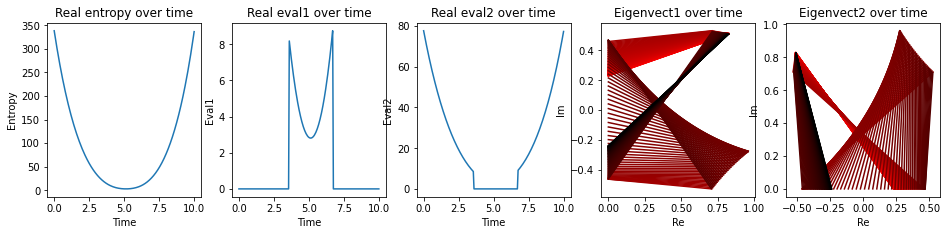

In [147]:
num_plots = 5
frame = plt.Figure(figsize=plt.figaspect(1/(num_plots)))
t_array = np.linspace(0, 10, num=num_ts)

# #ENTROPY 3D PLOT
# entropy_ax = frame.add_subplot(1, num_plots, 1, projection='3d')
# entropy_x = [component.real for component in entropies] 
# entropy_y = [component.imag for component in entropies] 
# entropy_ax.plot(np.array(entropy_x), np.array(entropy_y), t_array, label='parametric curve')
# entropy_ax.set_xlabel("Re")
# entropy_ax.set_ylabel("Im")
# entropy_ax.set_title("Entropy over time")

#ENTROPY 2D PLOT (JUST REAL PART)
entropy_ax = frame.add_subplot(1, num_plots, 1)
entropy_x = [component.real for component in entropies] 
entropy_ax.plot(t_array, np.array(entropy_x), label='parametric curve')
entropy_ax.set_xlabel("Time")
entropy_ax.set_ylabel("Entropy")
entropy_ax.set_title("Real entropy over time")

# #EIGENVALUE 1 3D PLOT
# eval1_ax = frame.add_subplot(1, num_plots, 2, projection='3d')
# eval1_x = [component.real for component in eval1] 
# eval1_y = [component.imag for component in eval1] 
# eval1_ax.plot(np.array(eval1_x), np.array(eval1_y), t_array, label='parametric curve')
# eval1_ax.set_xlabel("Re")
# eval1_ax.set_ylabel("Im")
# eval1_ax.set_title("Eigenval1 over time")

#EIGENVALUE 1 2D PLOT (JUST REAL PART)
eval1_ax = frame.add_subplot(1, num_plots, 2)
eval1_x = [component.real for component in eval1]
eval1_ax.plot(t_array, np.array(eval1_x), label='parametric curve')
eval1_ax.set_xlabel("Time")
eval1_ax.set_ylabel("Eval1")
eval1_ax.set_title("Real eval1 over time")

# #EIGENVALUE 2 3D PLOT
# eval2_ax = frame.add_subplot(1, num_plots, 3, projection='3d')
# eval2_x = [component.real for component in eval2] 
# eval2_y = [component.imag for component in eval2] 
# eval2_ax.plot(np.array(eval2_x), np.array(eval2_y), t_array, label='parametric curve')
# eval2_ax.set_xlabel("Re")
# eval2_ax.set_ylabel("Im")
# eval2_ax.set_title("Eigenval2 over time")

#EIGENVALUE 2 2D PLOT (JUST REAL PART)
eval2_ax = frame.add_subplot(1, num_plots, 3)
eval2_x = [component.real for component in eval2]
eval2_ax.plot(t_array, np.array(eval2_x), label='parametric curve')
eval2_ax.set_xlabel("Time")
eval2_ax.set_ylabel("Eval2")
eval2_ax.set_title("Real eval2 over time")

#EIGENVECTOR 1 PLOT
evect1_ax = frame.add_subplot(1, num_plots, 4)
evect1_pt1 = evect1[:,0]
evect1_pt2 = evect1[:,1]
evect1_pt1_real = [component.real for component in evect1_pt1] 
evect1_pt1_imag = [component.imag for component in evect1_pt1] 
evect1_pt2_real = [component.real for component in evect1_pt2] 
evect1_pt2_imag = [component.imag for component in evect1_pt2] 
#evect1_ax.quiver(evect1_pt1_real, evect1_pt1_imag, t_array, evect1_pt2_real, evect1_pt2_imag, t_array)
for i in range(num_ts):
    evect1_ax.plot([evect1_pt1_real[i],evect1_pt1_imag[i]], [evect1_pt2_real[i],evect1_pt2_imag[i]], color=(1-0.005*i, 0, 0))
evect1_ax.set_xlabel("Re")
evect1_ax.set_ylabel("Im")
evect1_ax.set_title("Eigenvect1 over time")

#EIGENVECTOR 2 PLOT
evect2_ax = frame.add_subplot(1, num_plots, 5)
evect2_pt1 = evect2[:,0]
evect2_pt2 = evect2[:,1]
evect2_pt1_real = [component.real for component in evect2_pt1] 
evect2_pt1_imag = [component.imag for component in evect2_pt1] 
evect2_pt2_real = [component.real for component in evect2_pt2] 
evect2_pt2_imag = [component.imag for component in evect2_pt2] 
for i in range(num_ts):
    evect2_ax.plot([evect2_pt1_real[i],evect2_pt1_imag[i]], [evect2_pt2_real[i],evect2_pt2_imag[i]], color=(1-0.005*i, 0, 0))
evect2_ax.set_xlabel("Re")
evect2_ax.set_ylabel("Im")
evect2_ax.set_title("Eigenvect2 over time")

frame

In [47]:
#during meeting
# x = [0, -8.042455772869037, 0.4104156269769683, 0.7626971134550099, 0.12854464458518508, 0.7365235537491663, 0.5104429911912247, -0.8622287451860423]

# arr = np.array([[a(x), b(x)], [c(x), d(x)]])
# np.linalg.eig(arr)
# p1 = complex(5.02542450*10**(-15), 2.59996203*10**(-15))
# temp = complex(5.02542450*10**(-15), 2.59996203*10**(-15))
# p2 = complex(7.77122319*10, -2.59996203*10**(-15))
# p1 = p1/(temp + p2)
# p2 = p2/(temp+p2)
# print("p1 ", p1)
# print("p2 ", p2)
# p1*np.log(p1) + p2*np.log(p2)

In [21]:
from sympy import *
from sympy.abc import x
from sympy.printing.latex import LatexPrinter, print_latex
from sympy.functions import exp

In [22]:
t, chi, delta, epsilon, c1, c2, c3, c4 = symbols('t chi Delta epsilon c1 c2 c3 c4')
psi1, psi2 = symbols('psi_1, psi_2', cls=Function)
phi1, phi2 = symbols('phi_1, phi_2', cls=Function)

In [25]:
exprpsi1 = c1*epsilon*exp(-t*sqrt(-delta**2 - 2*delta*chi - epsilon**2)/2)/(delta + 2*chi) + \
    c2*epsilon*t*exp(-t*sqrt(-delta**2 - 2*delta*chi - epsilon**2)/2)/(delta + 2*chi) + \
    c2*sqrt(-delta**2 - 2*delta*chi - epsilon**2)*exp(-t*sqrt(-delta**2 - 2*delta*chi - epsilon**2)/2)/(delta + 2*chi) + \
    c3*epsilon*exp(t*sqrt(-delta**2 - 2*delta*chi - epsilon**2)/2)/(delta + 2*chi) + \
    c4*epsilon*t*exp(t*sqrt(-delta**2 - 2*delta*chi - epsilon**2)/2)/(delta + 2*chi) + \
    c4*(delta**2 + 2*delta*chi + epsilon**2)*exp(t*sqrt(-delta**2 - 2*delta*chi - epsilon**2)/2) \
    /((delta + 2*chi)*sqrt(-delta**2 - 2*delta*chi - epsilon**2))
    
exprpsi2 = -c1*sqrt(-delta**2 - 2*delta*chi - epsilon**2)*exp(-t*sqrt(-delta**2 - 2*delta*chi - epsilon**2)/2)/(delta + 2*chi) + \
    c2*epsilon*exp(-t*sqrt(-delta**2 - 2*delta*chi - epsilon**2)/2)/(delta + 2*chi) - \
    c2*t*sqrt(-delta**2 - 2*delta*chi - epsilon**2)*exp(-t*sqrt(-delta**2 - 2*delta*chi - epsilon**2)/2)/(delta + 2*chi) + \
    c3*sqrt(-delta**2 - 2*delta*chi - epsilon**2)*exp(t*sqrt(-delta**2 - 2*delta*chi - epsilon**2)/2)/(delta + 2*chi) + \
    c4*epsilon*exp(t*sqrt(-delta**2 - 2*delta*chi - epsilon**2)/2)/(delta + 2*chi) + \
    c4*t*sqrt(-delta**2 - 2*delta*chi - epsilon**2)*exp(t*sqrt(-delta**2 - 2*delta*chi - epsilon**2)/2)/(delta + 2*chi)
    
exprphi1 = c1*exp(-t*sqrt(-delta**2 - 2*delta*chi - epsilon**2)/2) + \
    c2*t*exp(-t*sqrt(-delta**2 - 2*delta*chi - epsilon**2)/2) + \
    c3*exp(t*sqrt(-delta**2 - 2*delta*chi - epsilon**2)/2) + \
    c4*t*exp(t*sqrt(-delta**2 - 2*delta*chi - epsilon**2)/2)

exprphi2 = c2*exp(-t*sqrt(-delta**2 - 2*delta*chi - epsilon**2)/2) + \
    c4*exp(t*sqrt(-delta**2 - 2*delta*chi - epsilon**2)/2)

In [29]:
exprA = Abs(exprpsi1)**2 + Abs(exprpsi2)**2 + I*(exprpsi2*conjugate(exprpsi1) - exprpsi1*conjugate(exprpsi2))
exprB = exprpsi1*conjugate(exprphi1) + exprpsi2*conjugate(exprphi2) + I*(exprpsi2*conjugate(exprphi1) - exprpsi1*conjugate(exprphi2))
exprC = exprphi1*conjugate(exprpsi1) + exprphi2*conjugate(exprpsi2) + I*(exprphi2*conjugate(exprpsi1) - exprphi1*conjugate(exprpsi2))
exprD = Abs(exprphi1)**2 + Abs(exprphi2)**2 + I*(exprphi2*conjugate(exprphi1) - exprphi1*conjugate(exprphi2))


In [30]:
m = Matrix([[exprA, exprB], [exprC, exprD]])

In [38]:
p, d = m.diagonalize()

KeyboardInterrupt: 

In [ ]:
m.eigenvals()